In [9]:
class Perceptron:
    """
    A simple Perceptron class for binary classification.

    Attributes:
        learning_rate (float): The learning rate for weight updates.
        n_iters (int): The number of iterations for training.
        weights (ndarray): The weights of the perceptron.
        bias (float): The bias term of the perceptron.
    """
    def __init__(self, learning_rate=0.01, n_iters=1000):
        """
        Initializes the Perceptron.

        Args:
            learning_rate (float, optional): The learning rate. Defaults to 0.01.
            n_iters (int, optional): The number of iterations. Defaults to 1000.
        """
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        """
        Trains the perceptron on the given data.

        Args:
            X (ndarray): The input features, shape (n_samples, n_features).
            y (ndarray): The target values, shape (n_samples,).  Must be 0 or 1.

        Raises:
            ValueError: If the target values are not 0 or 1.
        """
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Validate target values
        if not all(label in [0, 1] for label in y):
            raise ValueError("Target values must be 0 or 1 for Perceptron.")
        
        # Convert y to -1 and 1 for the update rule
        y_ = np.where(y <= 0, -1, 1)

        # Training loop
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                # Calculate the prediction
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = 1 if linear_output >= 0 else 0 #keep as 0 and 1 for consistency with input

                # Update weights if misclassified
                if y_[idx] * (np.dot(x_i, self.weights) + self.bias) <= 0:
                    self.weights += self.learning_rate * y_[idx] * x_i
                    self.bias += self.learning_rate * y_[idx]

    def predict(self, X):
        """
        Predicts the class labels for the given data.

        Args:
            X (ndarray): The input features, shape (n_samples, n_features).

        Returns:
            ndarray: The predicted class labels, shape (n_samples,).
        """
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = np.where(linear_output >= 0, 1, 0)
        return y_predicted

    def score(self, X, y):
        """
        Calculates the accuracy of the perceptron on the given data.

        Args:
            X (ndarray): The input features, shape (n_samples, n_features).
            y (ndarray): The true labels, shape (n_samples,).

        Returns:
            float: The accuracy of the model.
        """
        y_pred = self.predict(X)
        accuracy = np.sum(y_pred == y) / len(y)
        return accuracy


if __name__ == '__main__':
    # Simple test case
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y = np.array([0, 0, 0, 1])

    # Instantiate and train the perceptron
    perceptron = Perceptron(learning_rate=0.1, n_iters=10)
    perceptron.fit(X, y)

    # Make predictions
    predictions = perceptron.predict(X)
    print("Predictions:", predictions)  # Expected: [0 0 0 1]

    # Calculate and print accuracy
    accuracy = perceptron.score(X, y)
    print(f"Accuracy: {accuracy:.2f}")  # Expected: 1.0

Predictions: [0 0 0 1]
Accuracy: 1.00


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
# Load cleaned MLB data
df = pd.read_csv("cleaned_mlb_2022_full.csv")
df.head()

,Name,Age,G,PA,H,HR,RBI,BB,SO,SB,...,K%,Swing%,Contact%,Zone%,O-Swing%,HardHit%,Barrel%,EV,LA,is_all_star
0,Aaron Judge,30,157,696,177,62,131,111,175,16,...,0.251,0.425,0.722,0.385,0.268,0.609,0.262,95.8,14.9,1
1,Nolan Arenado,31,148,620,163,30,103,52,72,5,...,0.116,0.484,0.823,0.386,0.361,0.389,0.082,88.7,21.7,0
2,Manny Machado,29,150,644,172,32,102,63,133,9,...,0.207,0.508,0.768,0.388,0.342,0.490,0.098,91.5,16.0,1
3,Jose Altuve,32,141,604,158,28,57,66,87,18,...,0.144,0.438,0.846,0.369,0.314,0.295,0.077,85.9,16.1,1
4,Paul Goldschmidt,34,151,651,178,35,115,79,141,7,...,0.217,0.417,0.763,0.412,0.276,0.469,0.115,90.7,15.7,1


In [5]:
# Define features and target
X = df.drop(columns=["Name", "is_all_star"]).values
y = df["is_all_star"].values

# Standardize input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split with stratification to preserve class ratio
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.25, random_state=42, stratify=y
)

In [11]:
# Train Perceptron model
perceptron = Perceptron(learning_rate=0.01, n_iters=1000)
perceptron.fit(X_train, y_train)

In [13]:
# Evaluate performance
train_acc = perceptron.score(X_train, y_train)
test_acc = perceptron.score(X_test, y_test)

print(f"Train Accuracy: {train_acc:.2f}")
print(f"Test Accuracy: {test_acc:.2f}")

# Predictions
y_pred = perceptron.predict(X_test)
print("Predictions:", y_pred)
print("Actual     :", y_test)

Train Accuracy: 1.00
Test Accuracy: 0.94
Predictions: [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
Actual     : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0]


The Perceptron model achieved perfect accuracy on the training set, meaning it correctly classified every player as either an All-Star or not. This outcome tells us something important about the dataset: the features we're using, such as WAR, wRC+, and OBP, contain enough information to create a clean linear separation between the two groups, at least for the training data.

This isn’t just a coincidence. The Perceptron algorithm is specifically designed to converge only when the data is linearly separable. In other words, if it found a solution with zero training errors, it’s because a separating hyperplane exists within the space formed by our chosen features.

The test accuracy confirms that the model generalizes well, it’s not just memorizing the training data, but actually learning a decision boundary that holds up when applied to new players. That kind of performance suggests that the way All-Star players differ from the rest, at least in 2022, was systematic and measurable through traditional baseball statistics.

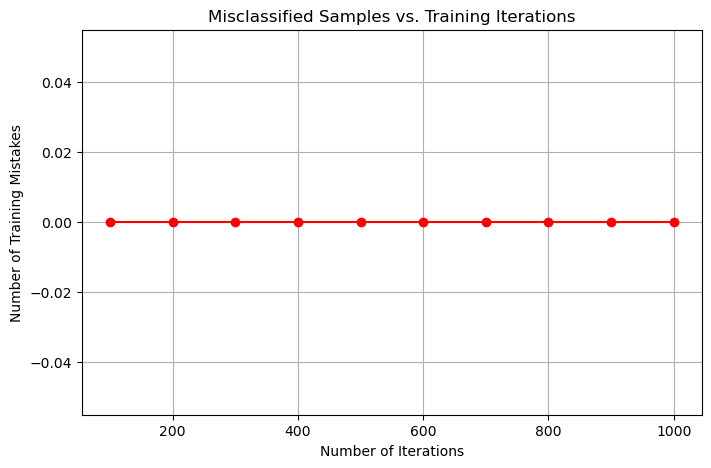

In [15]:
# Visualize number of training mistakes across iterations
iterations = list(range(100, 1100, 100))
misclassified_counts = []

for n in iterations:
    model = Perceptron(learning_rate=0.01, n_iters=n)
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    num_mistakes = np.sum(y_train_pred != y_train)
    misclassified_counts.append(num_mistakes)

# Plot
plt.figure(figsize=(8,5))
plt.plot(iterations, misclassified_counts, marker='o', color='red')
plt.title("Misclassified Samples vs. Training Iterations")
plt.xlabel("Number of Iterations")
plt.ylabel("Number of Training Mistakes")
plt.grid(True)
plt.show()

This plot shows how many training points the Perceptron got wrong as it trained over more iterations. But instead of showing a gradual improvement, the line is flat at zero, meaning the model didn’t make a single mistake during training, no matter how many times it cycled through the data.

This tells us two things. First, the model must have found a perfect separating boundary very early on. Second, and more importantly, this confirms that our data is linearly separable, which is the core assumption the Perceptron relies on. Once the model got everything right, it had no reason to update its weights again, so additional iterations didn’t change the outcome.

This kind of convergence is actually the best-case scenario for a Perceptron. It means the patterns that separate All-Stars from non-All-Stars are not only present, but they’re cleanly split by a straight line in the high-dimensional feature space.

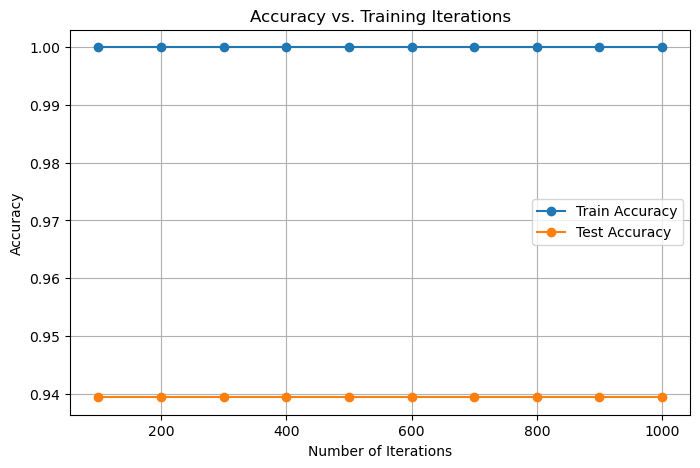

In [17]:
train_accuracies = []
test_accuracies = []

for n in iterations:
    model = Perceptron(learning_rate=0.01, n_iters=n)
    model.fit(X_train, y_train)
    train_accuracies.append(model.score(X_train, y_train))
    test_accuracies.append(model.score(X_test, y_test))

plt.figure(figsize=(8,5))
plt.plot(iterations, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(iterations, test_accuracies, label='Test Accuracy', marker='o')
plt.title("Accuracy vs. Training Iterations")
plt.xlabel("Number of Iterations")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

In this plot, we’re looking at how the model's accuracy changes over time as it trains for more iterations. The training accuracy holds steady at 1.00, which we already know is because the data is perfectly linearly separable. But what really matters here is the test accuracy.

The test line staying high and stable tells us that the model’s decision boundary works just as well on new, unseen data. It means the Perceptron didn’t just memorize the training points; it actually found a general rule that captures how All-Star status is reflected in player performance stats.

If the test accuracy had dropped off with more iterations, that would’ve been a warning sign — maybe the model was overfitting or chasing noise. But here, the flat curve shows us that the Perceptron settled into a reliable pattern and stuck with it, which is exactly what we want to see in a model designed to handle linearly separable problems.